In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'E:\datascience\baseball.csv')

In [3]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


W – Win, R – Run, AB – At bat, H – Hit, 2B – Double, 3B – Triple, HR – Home runs, BB – Base on balls , K (or SO) – Strikeout, SB – Stolen base, RA – Run average, ER – Earned run, ERA – Earned run average, CG – Complete game, SHO – Shutout, SV – Save, E – Errors

In [4]:
data.shape

(30, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


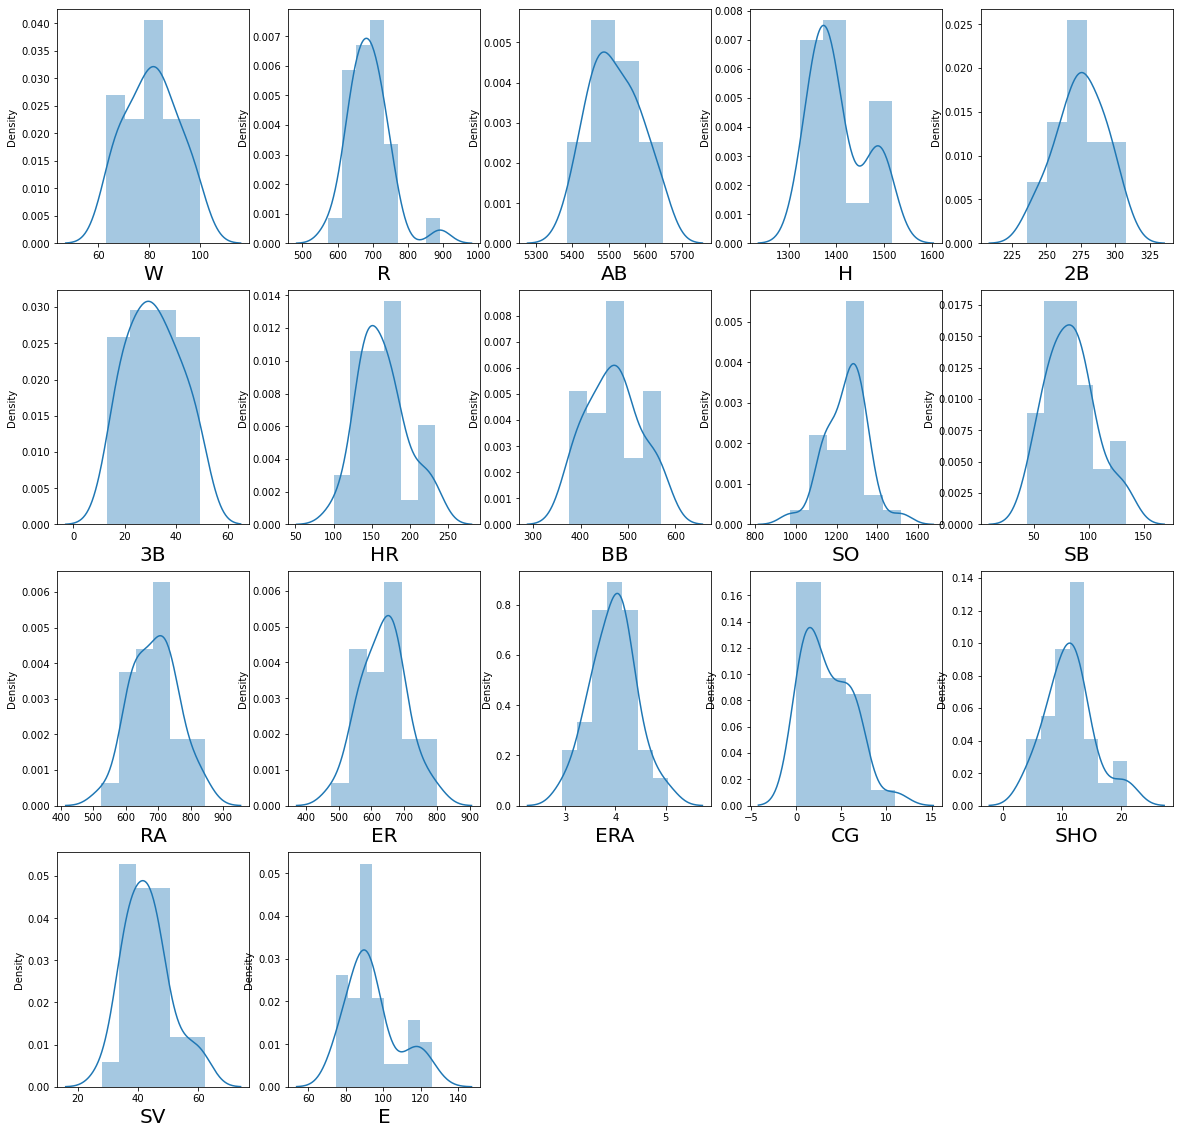

In [7]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<=17:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

In [8]:
df_features=data.drop('W',axis=1)

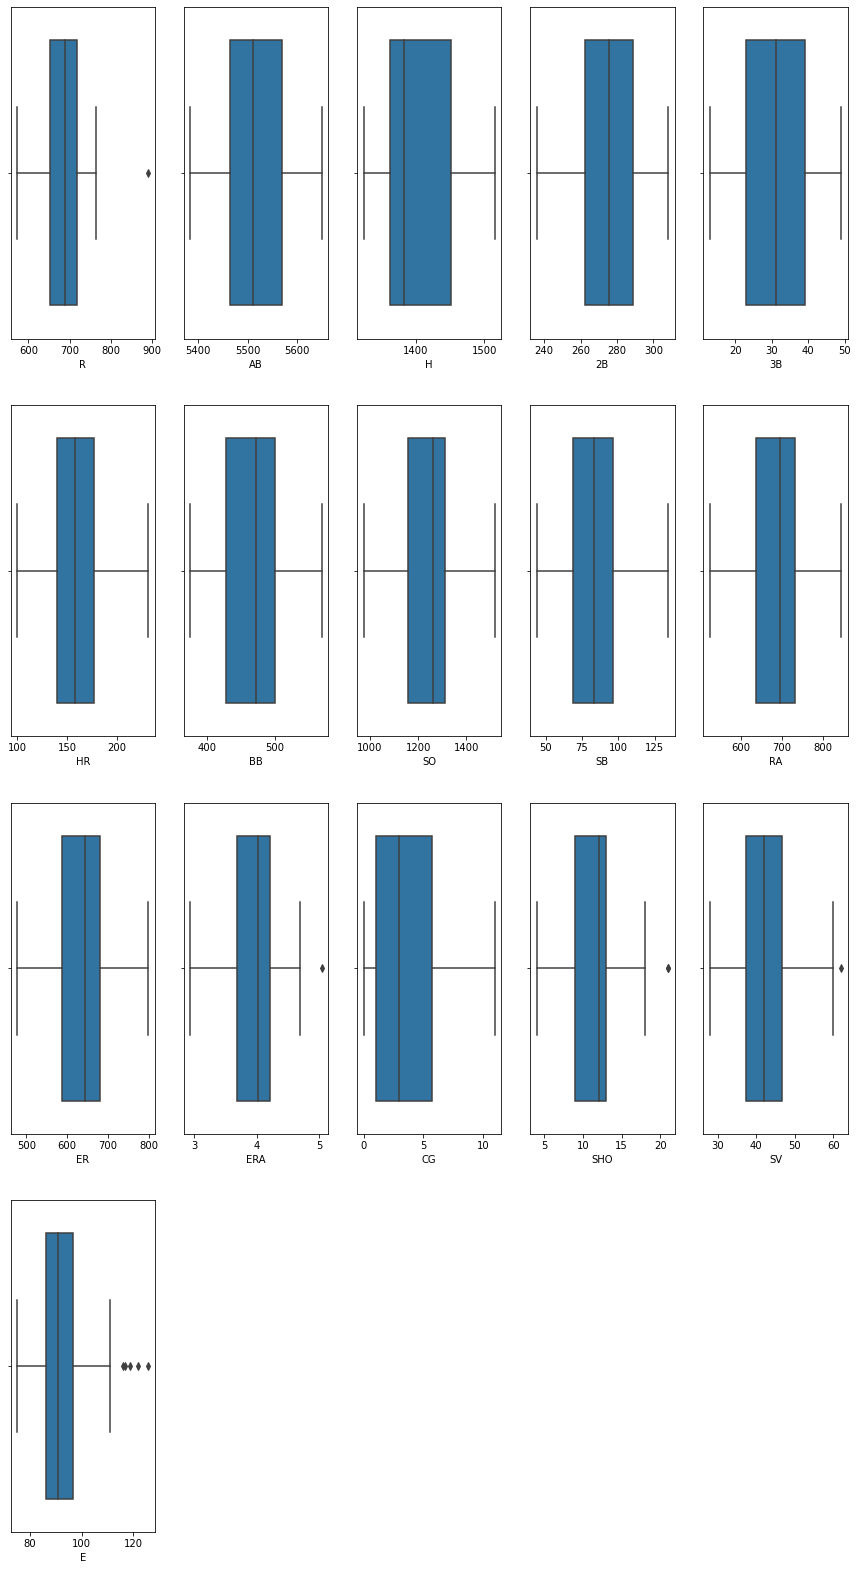

In [9]:
plt.figure(figsize=(15,50))
graph=1

for column in df_features:
    if graph<=35:
        ax=plt.subplot(7,5,graph)
        sns.boxplot(df_features[column],orient='v')
        plt.xlabel(column,fontsize=10)
        
    graph+=1
    
plt.show()

In [10]:
data.shape

(30, 17)

In [11]:
q1=data.quantile(0.25)

In [12]:
q1

W        74.0000
R       651.2500
AB     5464.0000
H      1363.0000
2B      262.2500
3B       23.0000
HR      140.2500
BB      428.2500
SO     1157.5000
SB       69.0000
RA      636.2500
ER      587.2500
ERA       3.6825
CG        1.0000
SHO       9.0000
SV       37.2500
E        86.0000
Name: 0.25, dtype: float64

In [13]:
q3=data.quantile(0.75)

In [14]:
q3

W        87.75
R       718.25
AB     5570.00
H      1451.50
2B      288.75
3B       39.00
HR      177.00
BB      501.25
SO     1311.50
SB       96.50
RA      732.50
ER      679.25
ERA       4.22
CG        5.75
SHO      13.00
SV       46.75
E        96.75
Name: 0.75, dtype: float64

In [15]:
iqr=q3-q1

In [16]:
iqr

W       13.7500
R       67.0000
AB     106.0000
H       88.5000
2B      26.5000
3B      16.0000
HR      36.7500
BB      73.0000
SO     154.0000
SB      27.5000
RA      96.2500
ER      92.0000
ERA      0.5375
CG       4.7500
SHO      4.0000
SV       9.5000
E       10.7500
dtype: float64

In [17]:
win_high=(q3.W+(1.5*iqr.W))
win_high

108.375

In [18]:
index=np.where(data['W']>win_high)
index

(array([], dtype=int64),)

In [19]:
win_low=(q1.W-(1.5*iqr.W))
win_low

53.375

In [20]:
index=np.where(data['W']<win_low)
index

(array([], dtype=int64),)

In [21]:
era_high=(q3.ERA+(1.5*iqr.ERA))
era_high

5.026250000000001

In [22]:
index=np.where(data['ERA']>era_high)
index

(array([29], dtype=int64),)

In [23]:
data=data.drop(data.index[index])
data.shape

(29, 17)

In [24]:
data.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [25]:
era_low=(q1.ERA-(1.5*iqr.ERA))
era_low

2.8762499999999993

In [26]:
index=np.where(data['ERA']<era_low)
index

(array([], dtype=int64),)

In [27]:
sho_high=(q3.SHO+(1.5*iqr.SHO))
sho_high

19.0

In [28]:
index=np.where(data['SHO']>sho_high)
index

(array([17, 25], dtype=int64),)

In [29]:
data=data.drop(data.index[index])

In [30]:
data.shape

(27, 17)

In [31]:
sv_high=(q3.SV+(1.5*iqr.SV))
sv_high

61.0

In [32]:
index=np.where(data['SV']>sv_high)
index

(array([15], dtype=int64),)

In [33]:
data=data.drop(data.index[index])

In [34]:
data.shape

(26, 17)

In [35]:
data=data.drop(columns={'E'})

In [36]:
data.shape

(26, 16)

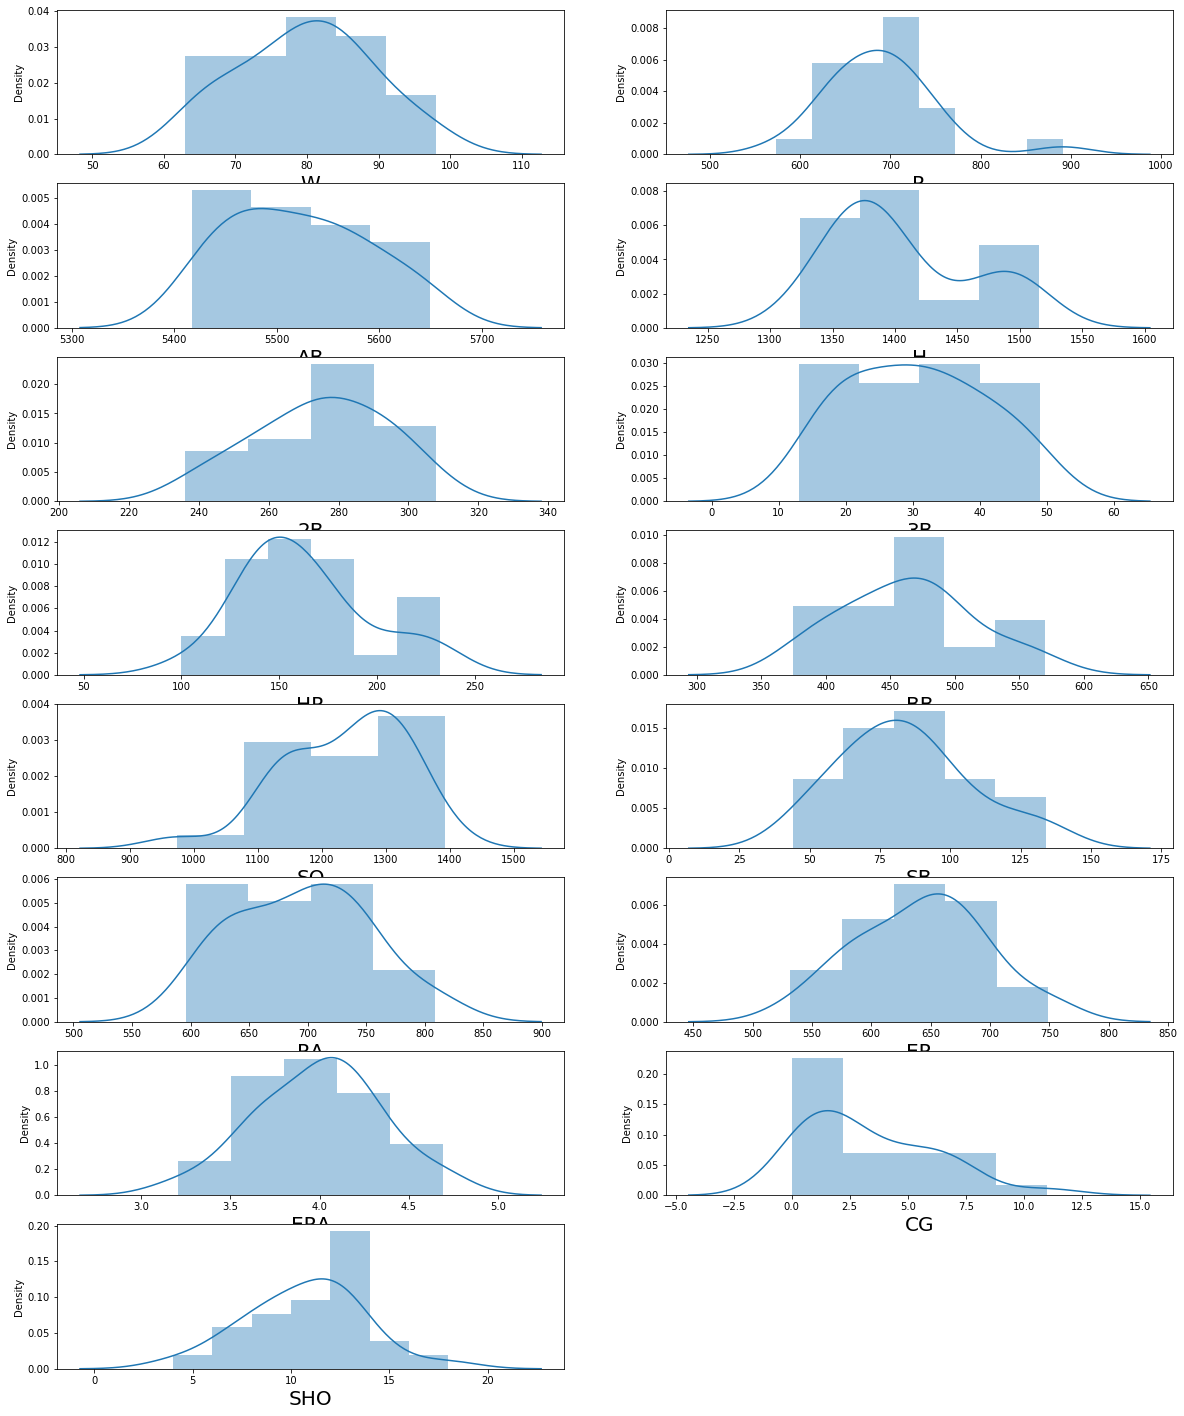

In [37]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<16:
        ax=plt.subplot(8,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

In [38]:
x=data.drop(columns=['W'])
y=data['W']

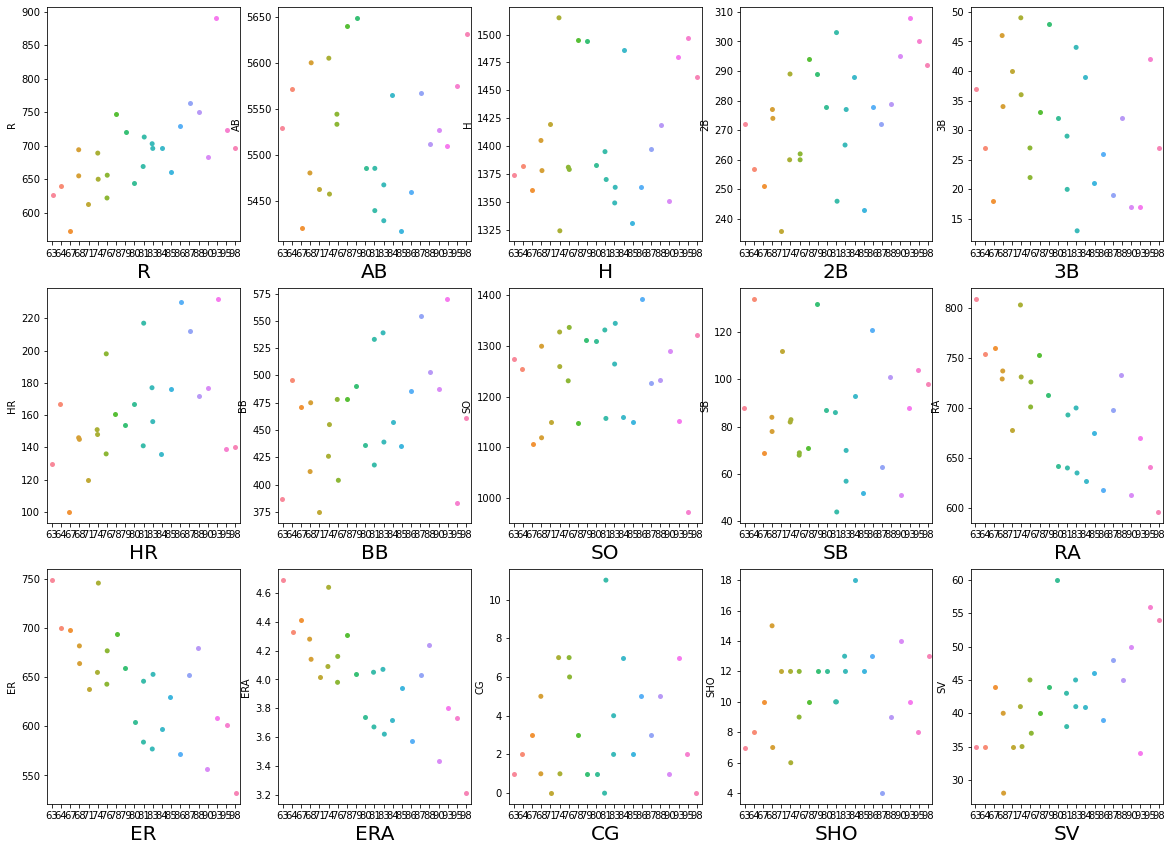

In [39]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in x:
    if plotnumber<=16:
        ax=plt.subplot(5,5,plotnumber)
        sns.stripplot(y,x[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

In [55]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [56]:
x_scaled.shape[1]

15

In [59]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"]=x.columns
vif

,vif,Features
0,14.322863,R
1,17.260825,AB
2,9.577420,H
3,5.072161,2B
4,4.864726,3B
5,10.639176,HR
6,4.105229,BB
7,2.924976,SO
8,2.817250,SB
9,108.627545,RA


<AxesSubplot:>

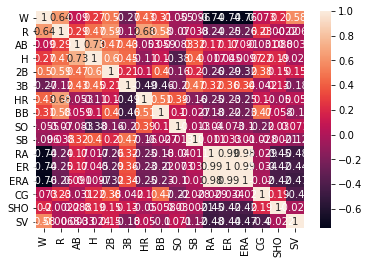

In [71]:
sns.heatmap(data.corr(), annot=True)

In [77]:
data=data.drop(columns=['RA'])

In [78]:
data=data.drop(columns=['ER'])

<AxesSubplot:>

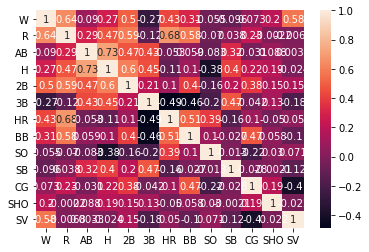

In [81]:
sns.heatmap(data.corr(), annot=True)

In [88]:
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV
0,95,724,5575,1497,300,42,139,383,973,104,2,8,56
1,83,696,5467,1349,277,44,156,439,1264,70,2,12,45
2,81,669,5439,1395,303,29,141,533,1157,86,11,10,38
3,76,622,5533,1381,260,27,136,404,1231,68,7,9,37
4,74,689,5605,1515,289,49,151,455,1259,83,7,12,35
5,93,891,5509,1480,308,17,232,570,1151,88,7,10,34
6,87,764,5567,1397,272,19,212,554,1227,63,3,4,48
7,81,713,5485,1370,246,20,217,418,1331,44,0,10,43
8,80,644,5485,1383,278,32,167,436,1310,87,1,12,60
9,78,748,5640,1495,294,33,161,478,1148,71,3,10,40


In [89]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [90]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [91]:
import pickle
with open('modelForPrediction.sav','wb')as f:
    pickle.dump(log_reg,f)
    
with open('SandardScaler.sav','wb')as f:
    pickle.dump(scaler,f)

In [95]:
y_pred=log_reg.predict(x_test)
y_pred

array([90, 87, 74, 78, 83, 83, 87], dtype=int64)

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [101]:
df=pd.read_csv(r'E:\datascience\baseball.csv')

In [102]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [103]:
df.shape

(30, 17)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [105]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [106]:
df.isnull(). sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

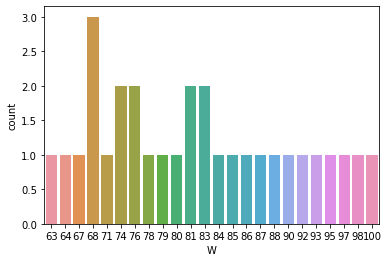

In [108]:
sns.countplot(x='W', data=df)
plt.show()

In [109]:
df.shape

(30, 17)

In [113]:
from sklearn.feature_selection import SelectKBest, f_classif

In [114]:
x=df.drop('W',axis=1)
y=df.W

In [120]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

In [121]:
from time import time

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25, random_state=355)

knn=KNeighborsClassifier()

In [126]:
start=time()
knn.fit(x_train,y_train)
print("knn training Time:",(time()-start))

knn training Time: 0.003991603851318359


In [127]:
start=time()
y_pred=knn.predict(x_test)
print("knn test Time:",(time()-start))

knn test Time: 0.07280635833740234


In [128]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [129]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

          64       0.00      0.00      0.00       0.0
          68       0.00      0.00      0.00       0.0
          71       0.00      0.00      0.00       1.0
          74       0.00      0.00      0.00       1.0
          76       0.00      0.00      0.00       0.0
          78       0.00      0.00      0.00       0.0
          81       0.00      0.00      0.00       1.0
          83       0.00      0.00      0.00       0.0
          86       0.00      0.00      0.00       1.0
          88       0.00      0.00      0.00       1.0
          90       0.00      0.00      0.00       1.0
          93       0.00      0.00      0.00       1.0
          95       0.00      0.00      0.00       1.0

    accuracy                           0.00       8.0
   macro avg       0.00      0.00      0.00       8.0
weighted avg       0.00      0.00      0.00       8.0

